### Import Libraries

In [23]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

### Load Data and Initial Exploration

In [2]:
data = pd.read_csv('data/Predictive_Maintenance_Case_Study.csv')
print(data.isnull().sum())
print("There are " + str(data.duplicated().sum()) + " duplicated rows")
print(data.info())
data.head(10)

UDI                    0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Failure                0
dtype: int64
There are 0 duplicated rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  object 
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB
None


,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,M,298.1,323.740741,1551,42.8,0,0
1,2,L,298.2,324.111111,1408,46.3,3,0
2,3,L,298.1,323.370370,1498,49.4,5,0
3,4,L,298.2,323.740741,1433,39.5,7,0
4,5,L,298.2,324.111111,1408,40.0,9,0
5,6,M,298.1,323.740741,1425,41.9,11,0
6,7,L,298.1,323.740741,1558,42.4,14,0
7,8,L,298.1,323.740741,1527,40.2,16,0
8,9,M,298.3,324.111111,1667,28.6,18,0
9,10,M,298.5,325.222222,1741,28.0,21,0


In [4]:
data['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

Type is Low (L), Medium (M), High (H) and will need to be converted to 1, 2, and 3 respectively.  Failure is a 1 if true and 0 if there was no failure.

In [5]:
encoded_data = data.copy()
encoded_data['Type'] = encoded_data['Type'].replace({'L': 1, 'M': 2, 'H': 3})
encoded_data.head()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,2,298.1,323.740741,1551,42.8,0,0
1,2,1,298.2,324.111111,1408,46.3,3,0
2,3,1,298.1,323.370370,1498,49.4,5,0
3,4,1,298.2,323.740741,1433,39.5,7,0
4,5,1,298.2,324.111111,1408,40.0,9,0


### Univariate Analysis

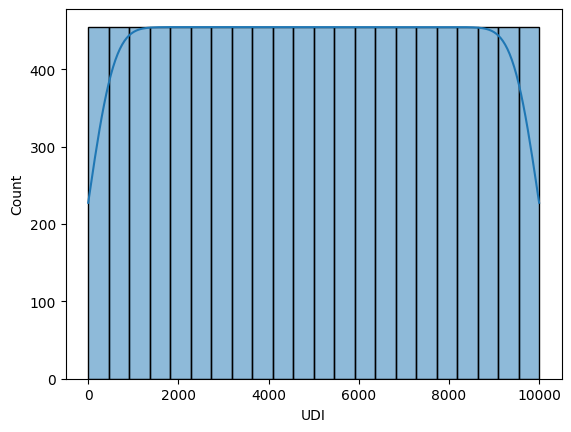

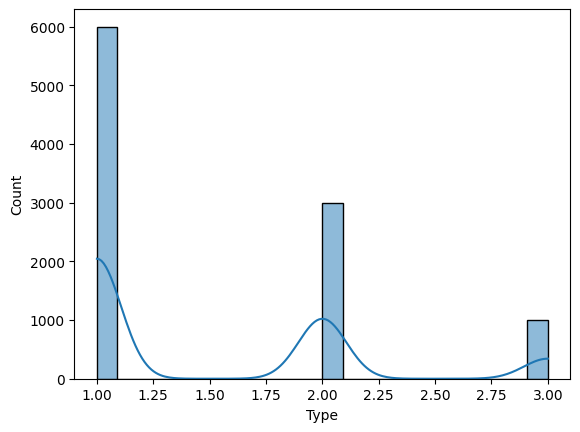

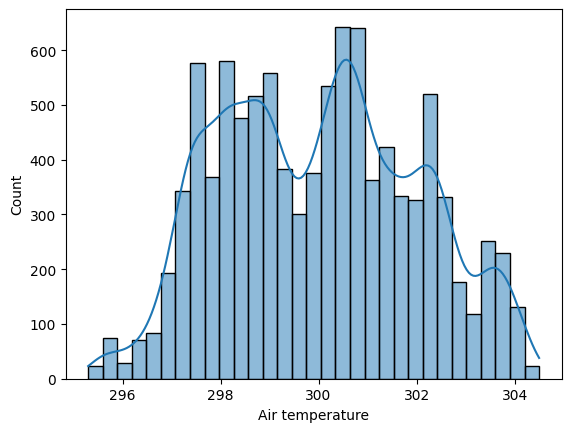

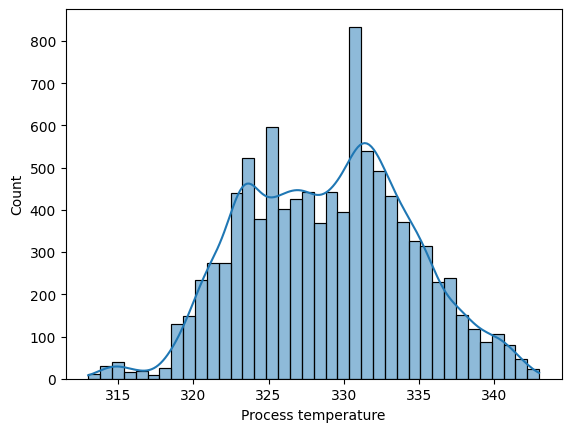

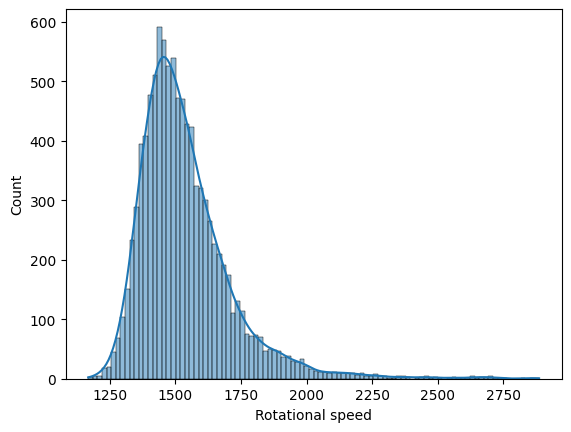

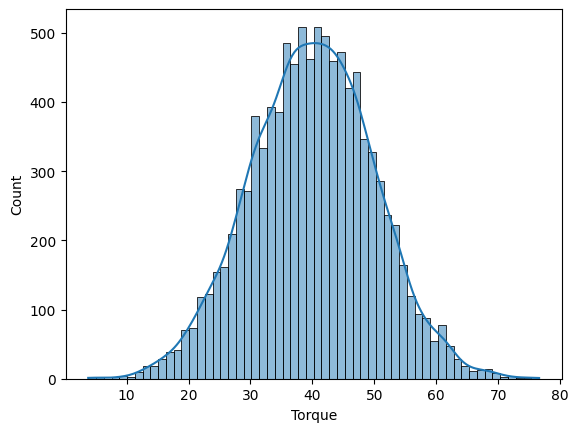

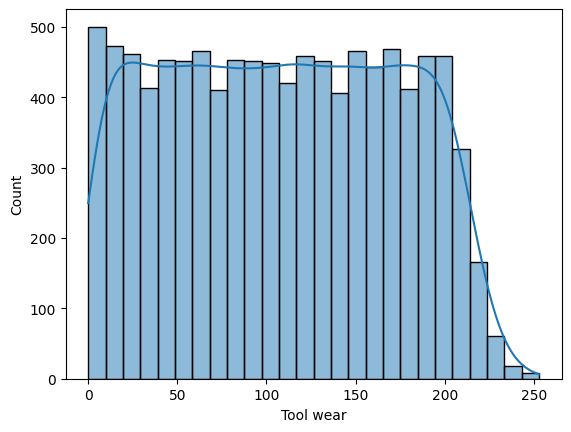

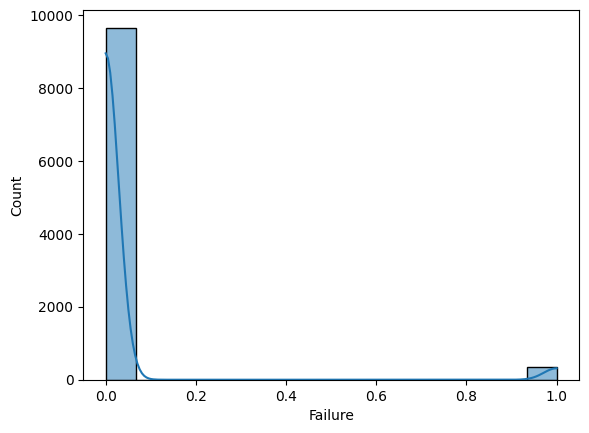

In [6]:
for column in encoded_data:
    sns.histplot(data=encoded_data, x=column, kde=True)
    plt.show();

Most of the qualities in the dataset are Low, followed by Medium, and then High which has the smallest amount.  There is a very large amount of non-failures in the data set.

In [13]:
print(str(encoded_data[encoded_data['Failure'] == 1].shape[0] / encoded_data.shape[0] * 100) + "% of the overall dataset are failures")

3.39% of the overall dataset are failures


### Bivariate Analysis

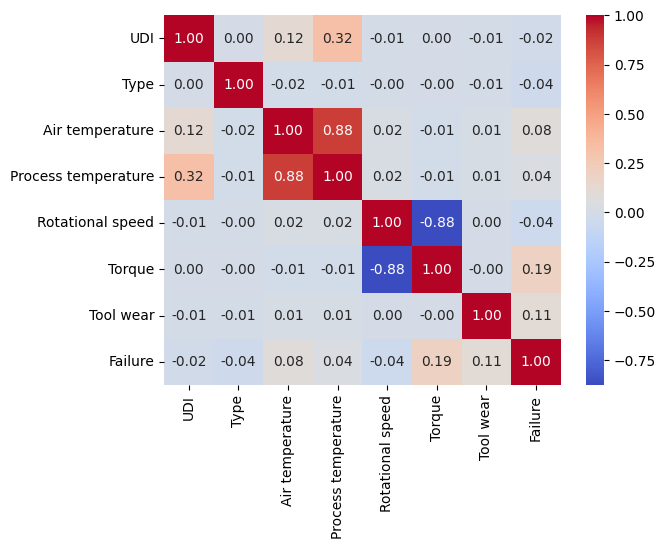

In [16]:
sns.heatmap(encoded_data.corr(), cmap="coolwarm", annot=True, fmt='0.2f')
plt.show();

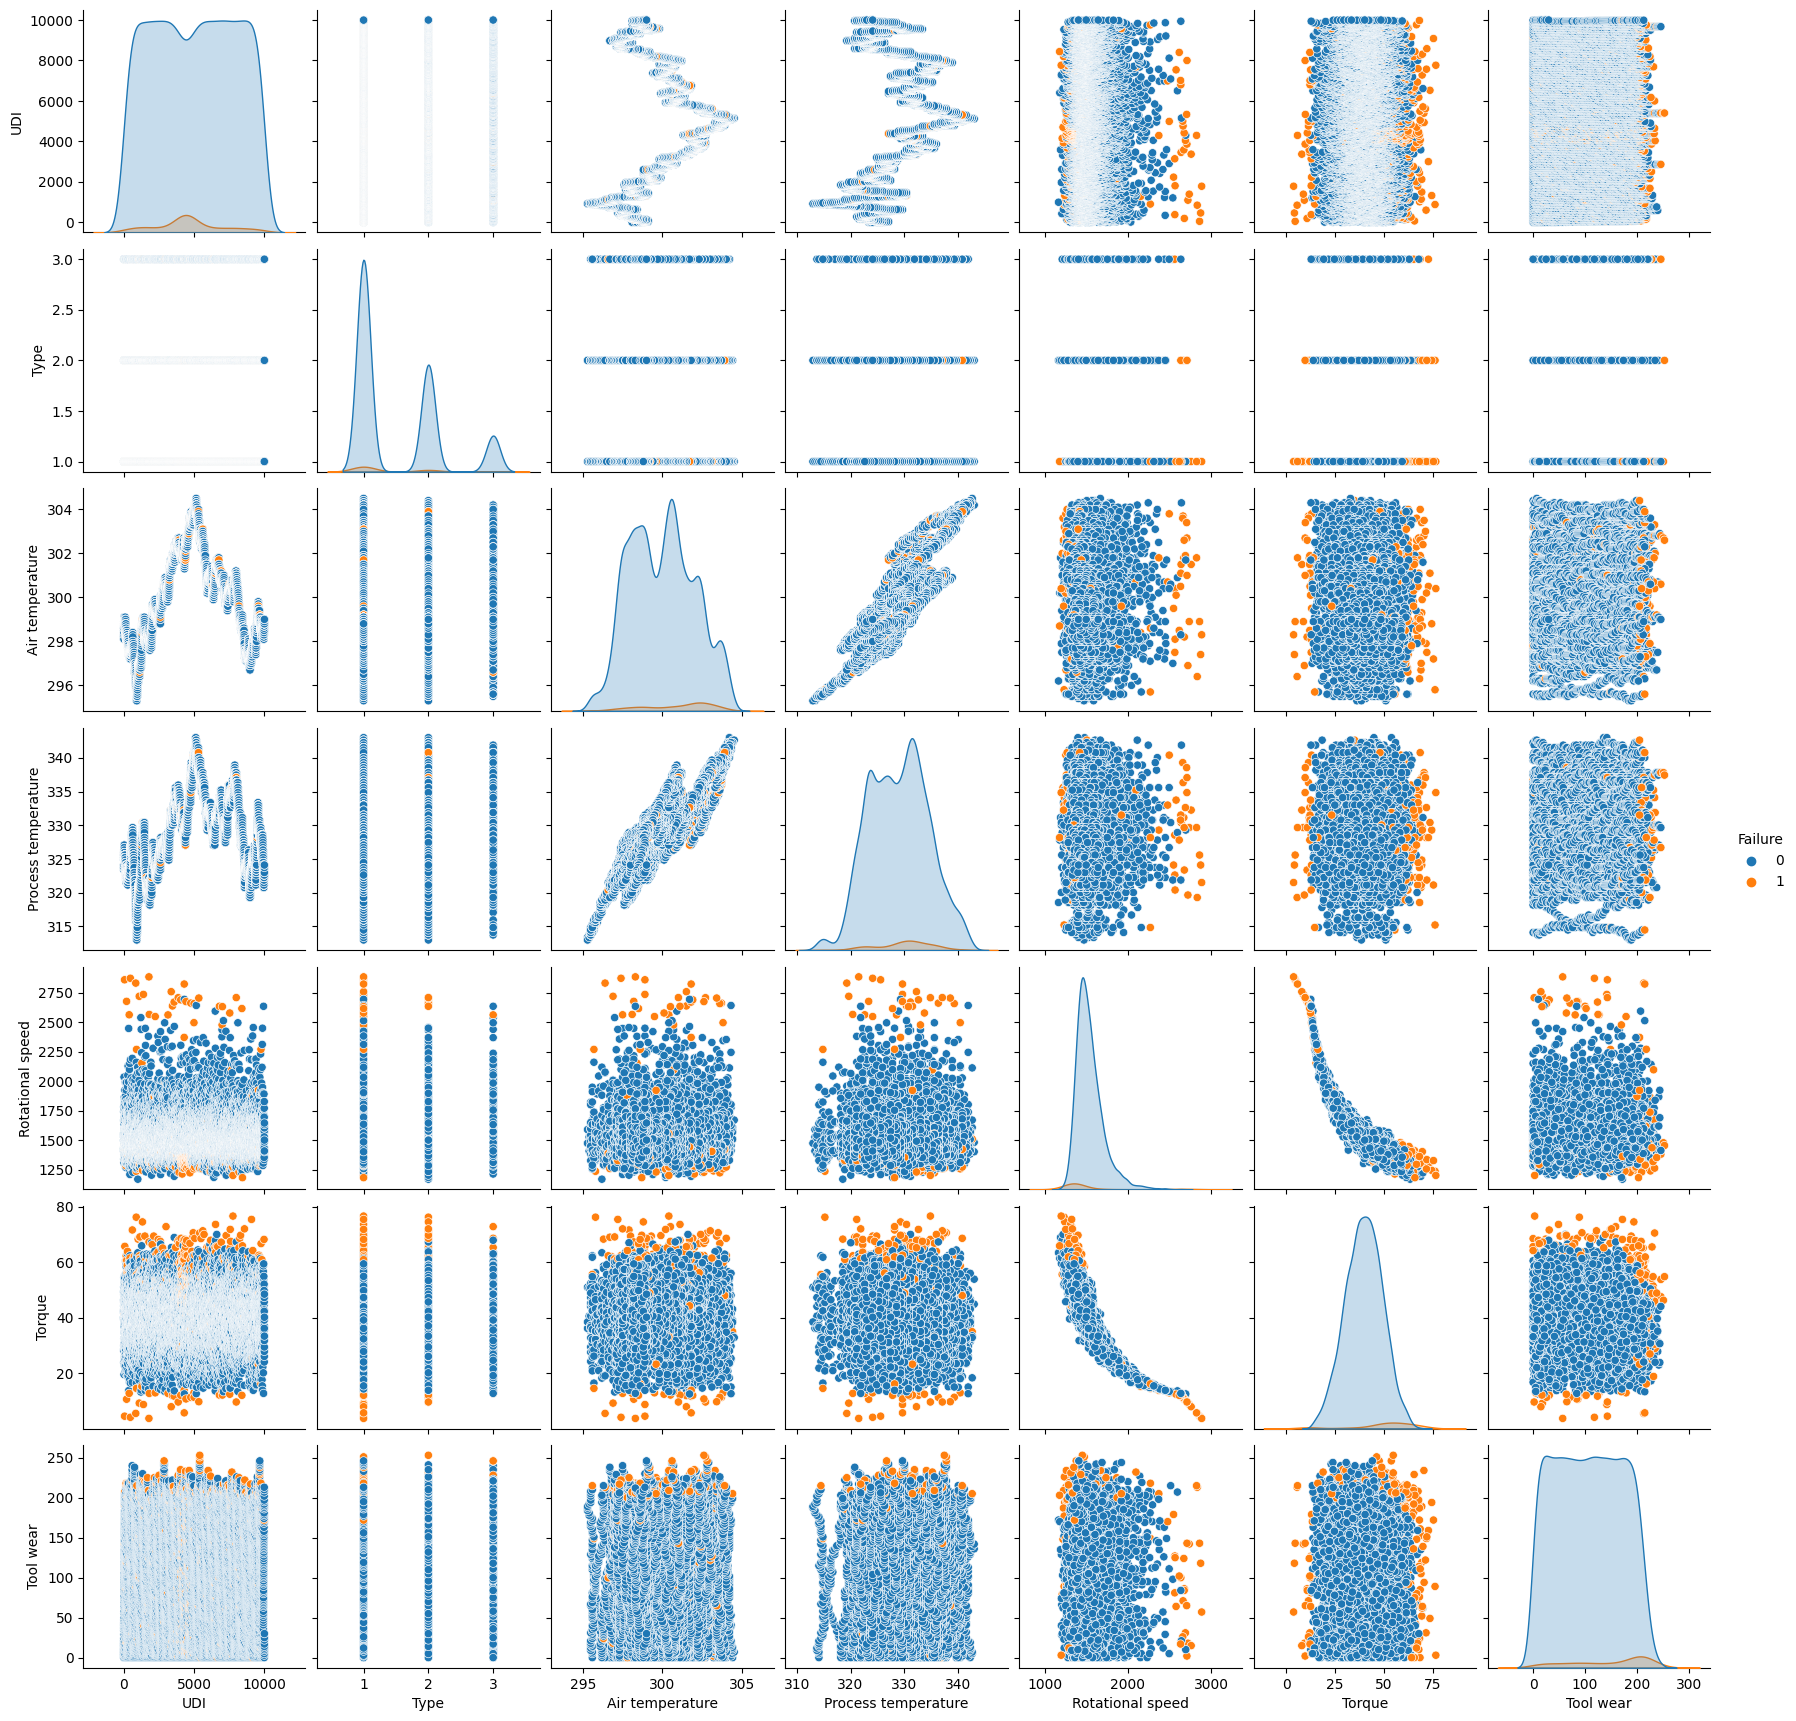

In [18]:
sns.pairplot(data=encoded_data, hue="Failure", diag_kind='kde');
plt.show();

Air temperature, Process temperature, Rotational Speed, Torque, and Tool wear seem to interesting.

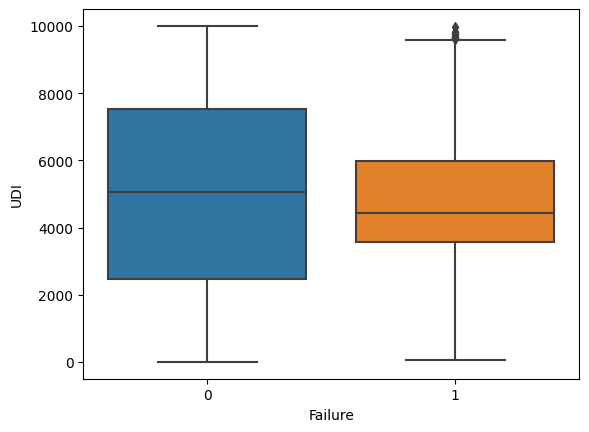

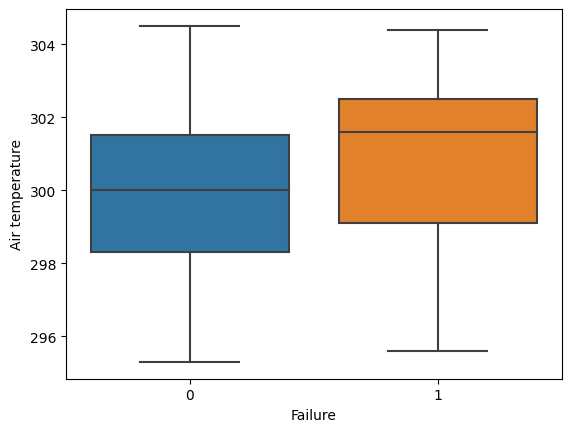

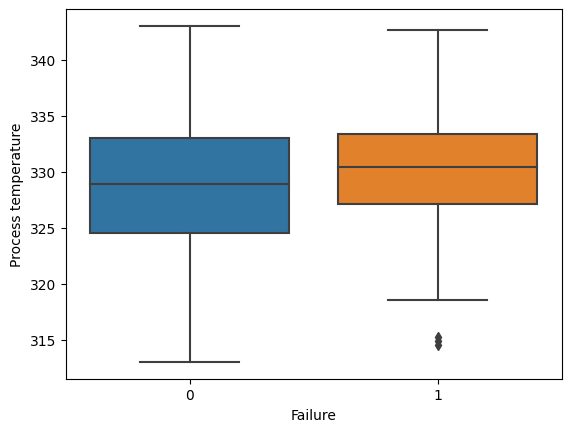

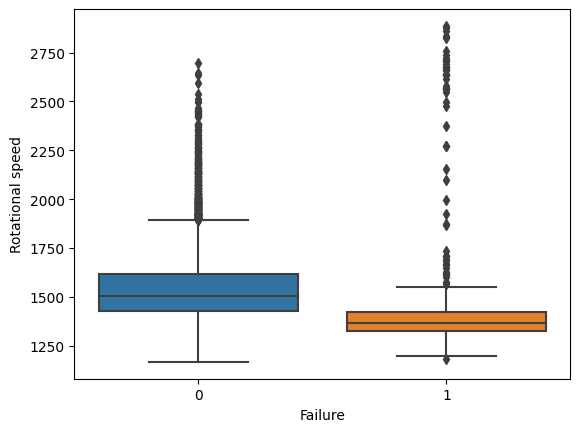

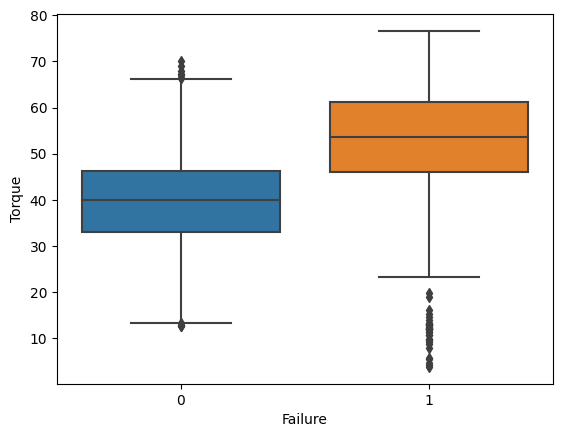

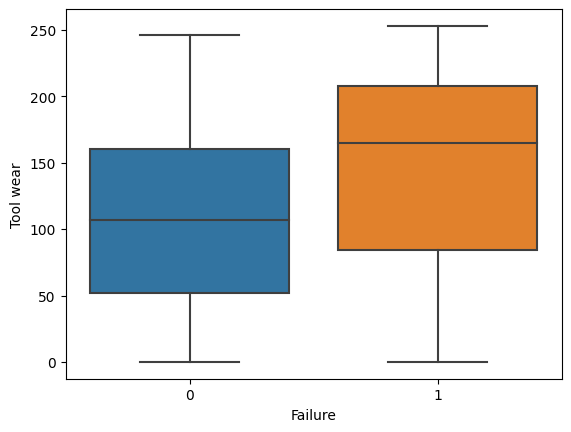

In [22]:
features = encoded_data.columns.tolist()
features.remove('Failure')
features.remove('Type')

for feature in features:
    sns.boxplot(data=encoded_data, x="Failure", y=feature)
    plt.show();

The `Torque` and `Rotational Speed` features seem to be the most indicative of failure, but there are many outliers in both categories.

### Model Preparation

In [24]:
X = encoded_data.drop('Failure', axis=1)
y = encoded_data['Failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=23, test_size=.2)

In [96]:
parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7],
    'max_features':['auto','sqrt','log2']
}
model = DecisionTreeClassifier();
cv = GridSearchCV(model,param_grid = parameter,cv = 5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

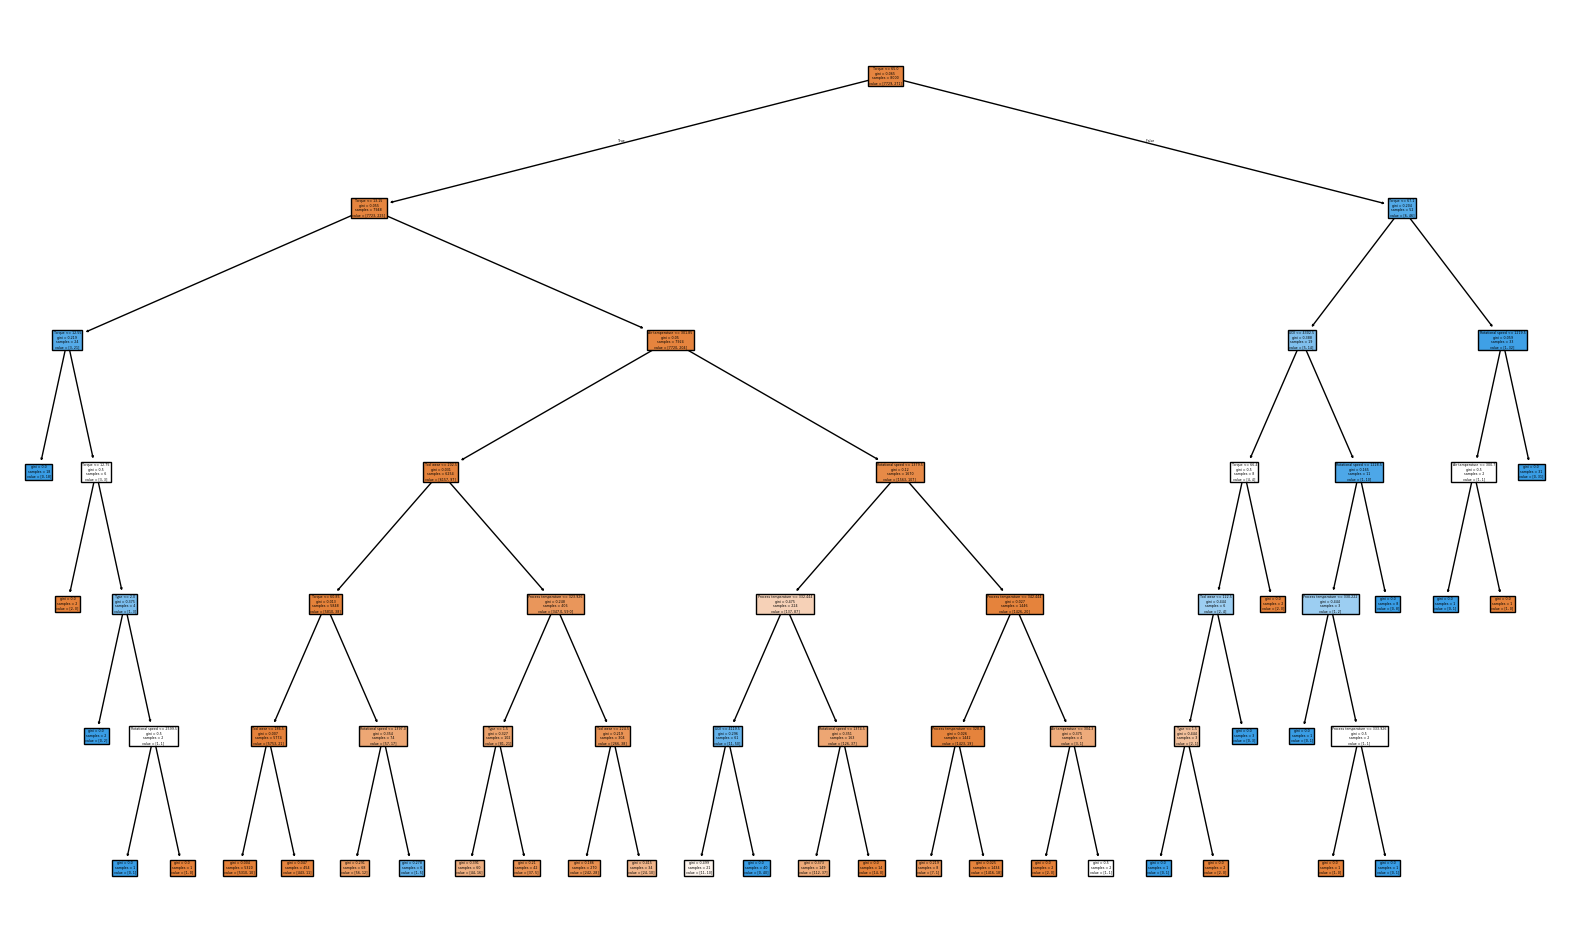

In [97]:
plt.figure(figsize=(20, 12))
tree.plot_tree(cv.best_estimator_, filled=True, feature_names=X_train.columns.tolist())
plt.show();

In [58]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

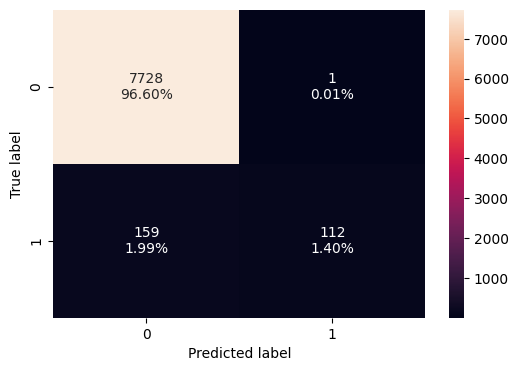

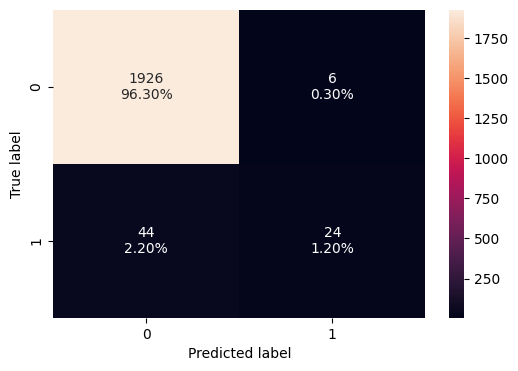

In [98]:
prune_train_df = model_performance_classification_sklearn(cv, X_train, y_train)
confusion_matrix_sklearn(cv, X_train, y_train)
prune_test_df = model_performance_classification_sklearn(cv, X_test, y_test)
confusion_matrix_sklearn(cv, X_test, y_test)

In [99]:
print(prune_train_df)
print(prune_test_df)

   Accuracy    Recall  Precision        F1
0      0.98  0.413284    0.99115  0.583333
   Accuracy    Recall  Precision        F1
0     0.975  0.352941        0.8  0.489796


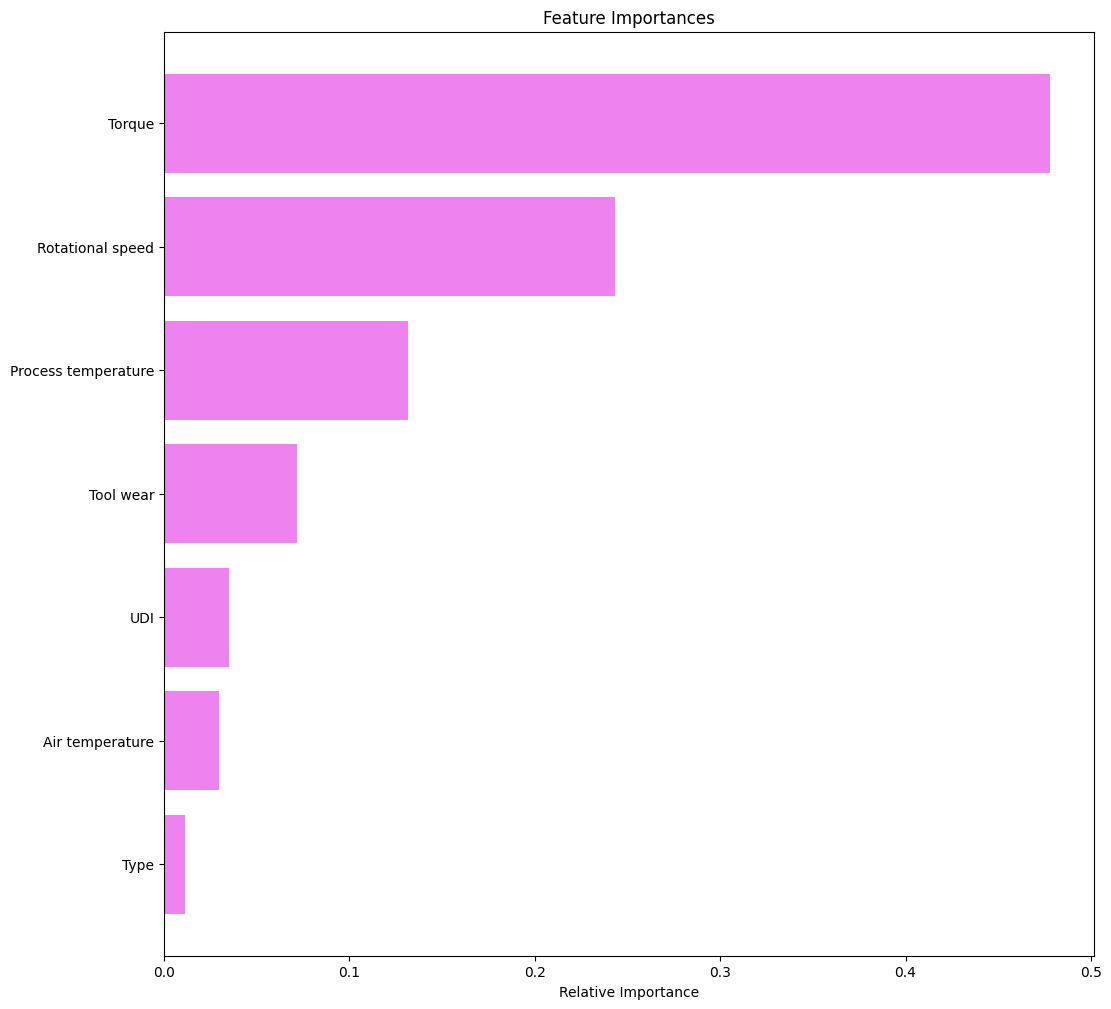

In [100]:
feature_names = X.columns.tolist()
importances = cv.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [111]:
print("Grid Search Best Options")
print("Max Depth: " + str(cv.best_estimator_.max_depth))
print("Max Features: " + str(cv.best_estimator_.max_features))
print("Splitter: " + str(cv.best_estimator_.splitter))
print("Criterion: " + str(cv.best_estimator_.criterion))

Grid Search Best Options
Max Depth: 6
Max Features: log2
Splitter: best
Criterion: gini
